# Brazilian Crime Reports Data Analysis

## A seguinte análise tem como objetivo analisar os dados da Secretaria da Segurança Pública do Rio grande do Sul, com informações de registros criminais de 2022 a 2025, buscando responder algumas perguntas.
### Vamos começar importando e juntando as tabelas para análisar as colunas e ter uma ideia doque podemos perguntar/responder:

In [71]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

### Importando as planilhas:

In [34]:
data_2022 = "C:/Users/gusta/OneDrive/Área de Trabalho/Python - Projetos/AnálisesPortifólio/Dados/Criminalidade Rio grande do sul/data_2022.csv"

data_2023 = "C:/Users/gusta/OneDrive/Área de Trabalho/Python - Projetos/AnálisesPortifólio/Dados/Criminalidade Rio grande do sul/data_2023.csv"

data_2024 = "C:/Users/gusta/OneDrive/Área de Trabalho/Python - Projetos/AnálisesPortifólio/Dados/Criminalidade Rio grande do sul/data_2024.csv"

data_2025 = "C:/Users/gusta/OneDrive/Área de Trabalho/Python - Projetos/AnálisesPortifólio/Dados/Criminalidade Rio grande do sul/data_2025.csv"

In [ ]:
cols = pd.read_csv(data_2022, sep=";", encoding="cp1252", nrows=1).columns.tolist()
print(cols)

['Sequência', 'Data Fato', 'Hora Fato', 'Grupo Fato', 'Tipo Enquadramento', 'Tipo Fato', 'Municipio Fato', 'Local Fato', 'Bairro', 'Quantidade Vítimas', 'Idade Vítima', 'Sexo Vítima', 'Cor Vítima', '...', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 

### Na saída anterior, podemos observar que há muitas colunas vazias que estão sendo contadas, oque pode atrapalhar na leitura dos dados posteriormente

In [ ]:
cols = ['Sequência', 'Data Fato', 'Hora Fato', 'Grupo Fato', 'Tipo Enquadramento', 'Tipo Fato', 'Municipio Fato', 'Local Fato', 'Bairro', 'Quantidade Vítimas', 'Idade Vítima', 'Sexo Vítima', 'Cor Vítima']

### Agora podemos apagar as colunas em branco e formar um único Data Frame e fazer uma análise superficial dos dados:

In [ ]:
data22 = pd.read_csv(data_2022, sep = ";", encoding = "cp1252", usecols = cols, low_memory = False )
data23 = pd.read_csv(data_2023, sep = ";", encoding = "cp1252", usecols = cols, low_memory = False )
data24 = pd.read_csv(data_2024, sep = ";", encoding = "cp1252", usecols = cols, low_memory = False )
data25 = pd.read_csv(data_2025, sep = ";", encoding = "cp1252", usecols = cols, low_memory = False )

In [46]:
data = pd.concat([data22, data23, data24, data25])
print(data)

       Sequência   Data Fato Hora Fato Grupo Fato  \
0              1  01/01/2022  00:01:00     CRIMES   
1              2  01/01/2022  00:01:00     CRIMES   
2              3  01/01/2022  00:01:00     CRIMES   
3              4  01/01/2022  00:01:00     CRIMES   
4              5  01/01/2022  00:01:00     CRIMES   
...          ...         ...       ...        ...   
565927    566270  30/09/2025  23:49:04     CRIMES   
565928    566271  30/09/2025  23:50:00     CRIMES   
565929    566272  30/09/2025  23:58:00     CRIMES   
565930    566273  30/09/2025  23:59:00     CRIMES   
565931    566274  30/09/2025  23:59:25     CRIMES   

                 Tipo Enquadramento  Tipo Fato    Municipio Fato  Local Fato  \
0                     OUTROS CRIMES  Consumado  BARRA DO RIBEIRO      OUTROS   
1                     OUTROS CRIMES  Consumado     NOVO HAMBURGO      OUTROS   
2                           INJURIA  Consumado      PORTO ALEGRE  RESIDENCIA   
3             ESTUPRO DE VULNERAVEL  Consum

## Sabemos que temo 13 colunas e cerca de 2,7 milhões de linhas, agora, podemos fazer algumas perguntas e reponde-las ao longo da análise:
### - Os crimes são mais residenciais ou urbanos?
### - A cor da vítima influência nas ocorrências?
### - Qual tipo de crime mais ocorre?
### - Há uma época do ano que propricia os crimes? (Carnaval, por exemplo)
### - Há mais homens ou mulheres como vítimas ou é um número parecido?

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2731156 entries, 0 to 565931
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Sequência           object 
 1   Data Fato           object 
 2   Hora Fato           object 
 3   Grupo Fato          object 
 4   Tipo Enquadramento  object 
 5   Tipo Fato           object 
 6   Municipio Fato      object 
 7   Local Fato          object 
 8   Bairro              object 
 9   Quantidade Vítimas  float64
 10  Idade Vítima        float64
 11  Sexo Vítima         object 
 12  Cor Vítima          object 
dtypes: float64(2), object(11)
memory usage: 291.7+ MB


### O formato das colunas "Data Fato", "Hora Fato" e "Sequência" estão como object, precisamos converte-los:

In [ ]:
data["Data Fato"] = pd.to_datetime(data["Data Fato"], errors = "coerce", dayfirst = True)
data["Hora Fato"] = pd.to_datetime(data["Hora Fato"], format = "%H:%M:%S", errors = "coerce").dt.time
data = data.drop("Sequência", axis = 1)

### Verificando o tipo das colunas e quantidade de nulos

In [ ]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 2731156 entries, 0 to 565931
Data columns (total 12 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Data Fato           datetime64[ns]
 1   Hora Fato           object        
 2   Grupo Fato          object        
 3   Tipo Enquadramento  object        
 4   Tipo Fato           object        
 5   Municipio Fato      object        
 6   Local Fato          object        
 7   Bairro              object        
 8   Quantidade Vítimas  float64       
 9   Idade Vítima        float64       
 10  Sexo Vítima         object        
 11  Cor Vítima          object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 270.9+ MB


Data Fato                  1
Hora Fato                  1
Grupo Fato                 0
Tipo Enquadramento         0
Tipo Fato                  1
Municipio Fato             1
Local Fato                 1
Bairro                543911
Quantidade Vítimas        14
Idade Vítima          426709
Sexo Vítima           427709
Cor Vítima            425306
dtype: int64

## Em um primeiro momento um número tão alto de campos não preenchido pode assustar, mas se pararmos para analisar, muitos crimes cometido não tem vítima, então qualquer campo relacionado a vítima fica em branco ( percebe-se que o número de campos em branco são bem parecidos). A solução seria preencher os campos de nulos dessas colunas com "Não se aplica" ou "Indefinido", surgindo um novo questionamento:
### - Quais crimes normalmente possuem vítima e quais não possuem?

## Infelizmente, a coluna "Bairro" está realmente com 540 mil dados faltantes, uma solução é substituir pelo municipio ou preencher como "Não Informado", deixando a análise por bairro com menor prioridade, e focando na análise dos municipios.

In [97]:
data["Bairro"] = data["Bairro"].fillna("Não Informado")
data["Sexo Vítima"] = data["Sexo Vítima"].replace("Indefinido", "Não se aplica")
data["Cor Vítima"] = data["Cor Vítima"].fillna("Não se aplica")
data["Tipo Enquadramento"] = data["Tipo Enquadramento"].replace("LESAO CORPORAL CULPOSA DIRECAO VEIC AUTOMOTOR", "ATROPELAMENTO")

### Para preencher a idade da vítima, vamos utilizar a mediana, pois nesse caso, será menos sensivel a Out Liners

In [67]:
data["Idade Vítima"] = data["Idade Vítima"].fillna(data["Idade Vítima"].median())

In [68]:
data.isna().sum()

Data Fato              1
Hora Fato              1
Grupo Fato             0
Tipo Enquadramento     0
Tipo Fato              1
Municipio Fato         1
Local Fato             1
Bairro                 0
Quantidade Vítimas    14
Idade Vítima           0
Sexo Vítima            0
Cor Vítima             0
dtype: int64

### Pelo número de valores totais, os valores nulos que restaram são irrelevantes, por isso vamos apaga-los:

In [69]:
data = data.dropna()

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2731142 entries, 0 to 565931
Data columns (total 12 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Data Fato           datetime64[ns]
 1   Hora Fato           object        
 2   Grupo Fato          object        
 3   Tipo Enquadramento  object        
 4   Tipo Fato           object        
 5   Municipio Fato      object        
 6   Local Fato          object        
 7   Bairro              object        
 8   Quantidade Vítimas  float64       
 9   Idade Vítima        float64       
 10  Sexo Vítima         object        
 11  Cor Vítima          object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 270.9+ MB


### Com os dados limpos, podemos traçar alguns gráficos em busca de responder as perguntas:

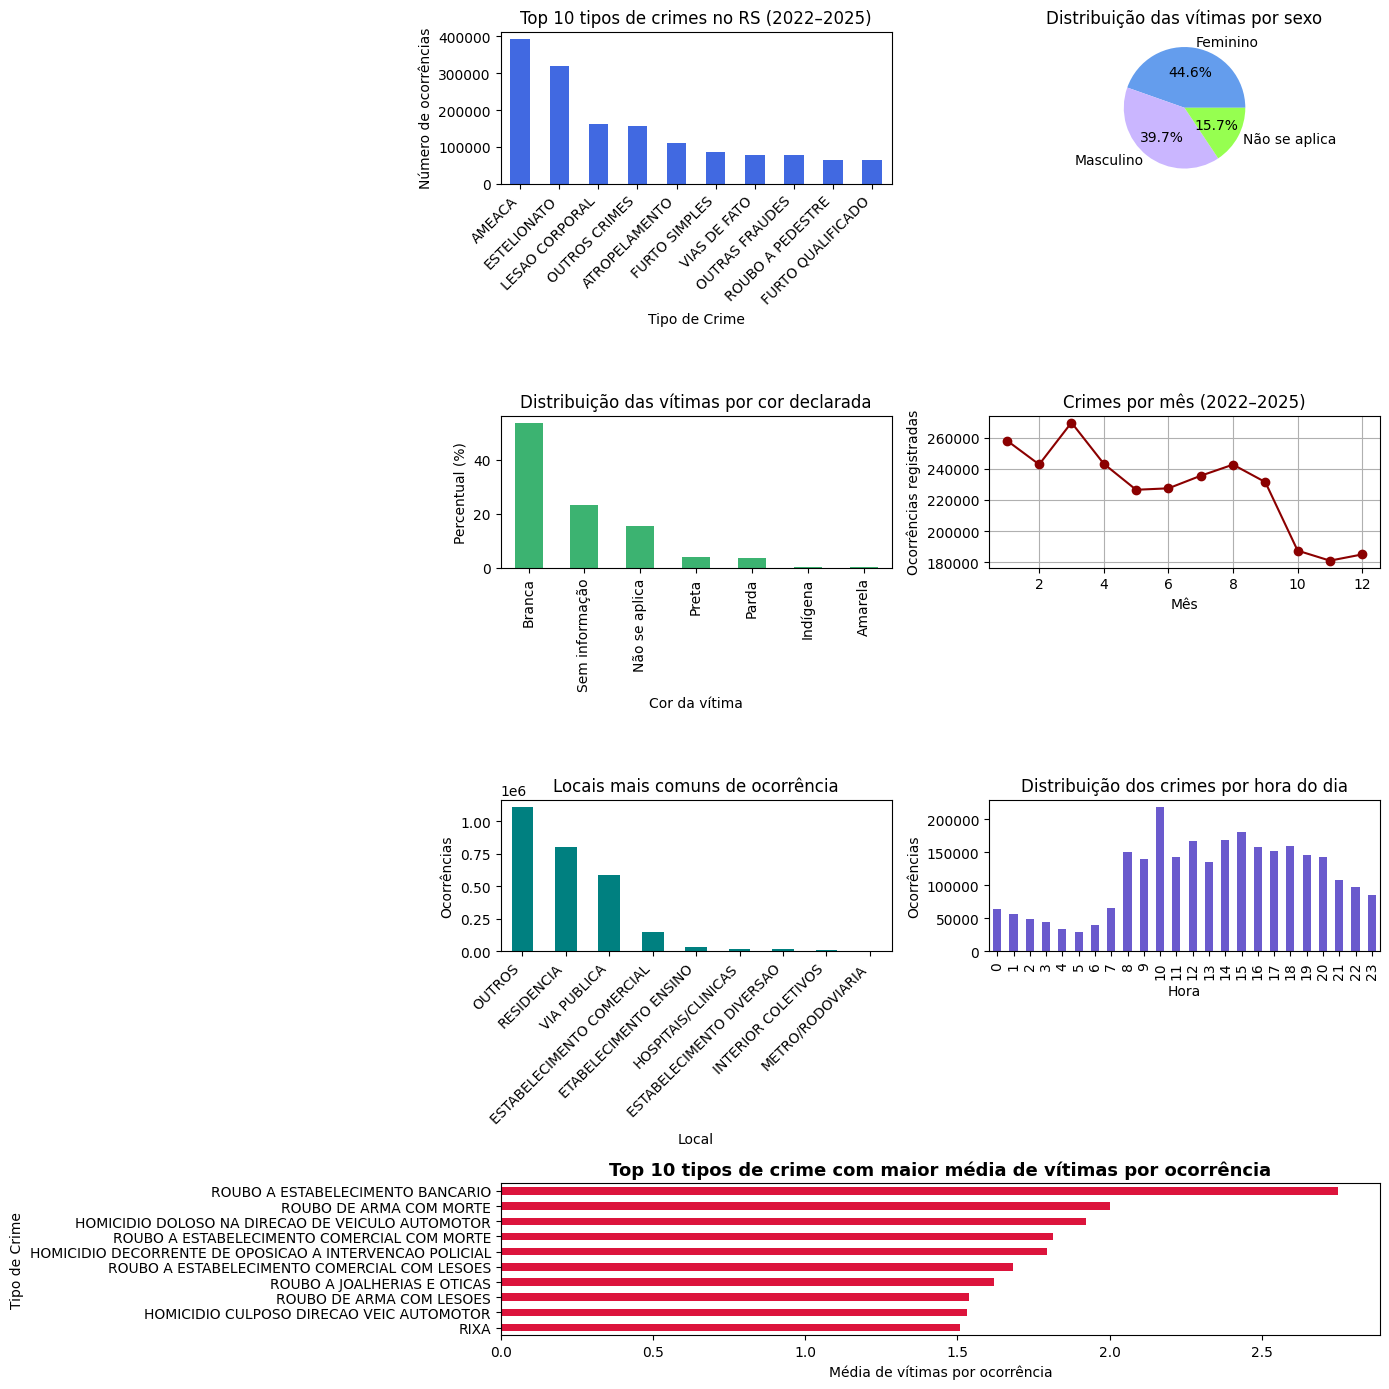

Tipo Enquadramento
FABRICO COMERCIO OU DENTENCAO DE ARMA BRANCA OU MUNICAO                                                             0.0
CONDESCENDENCIA CRIMINOSA                                                                                           0.0
ROUBO A POSTO BANCARIO                                                                                              0.0
CRIMES OCORRIDOS NA INVESTIGACAO E NA OBTENCAO DA PROVA DO CRIME ORGANIZADO ARTIGOS 18 A 21 DA LEI 12850 DE 2013    0.0
CONSTITUICAO DE MILICIA PRIVADA                                                                                     0.0
Name: Quantidade Vítimas, dtype: float64

In [116]:
plt.figure(figsize=(14, 14))

# Top 10 tipos de crimes
plt.subplot(4, 2, 1)

top_crimes = data["Tipo Enquadramento"].value_counts().head(10)
top_crimes.plot(kind="bar", color="royalblue")
plt.title("Top 10 tipos de crimes no RS (2022–2025)")
plt.xlabel("Tipo de Crime")
plt.ylabel("Número de ocorrências")
plt.xticks(rotation=45, ha="right")

# Distribuição por sexo

plt.subplot(4, 2, 2)
plt.subplots_adjust(left=0.08, right=0.95, wspace=0.3, hspace=0.5)

sexo_vitima = data["Sexo Vítima"].value_counts(normalize=True) * 100
sexo_vitima.plot(kind="pie", autopct="%.1f%%", colors=["#649DED","#CAB6FF","#96FF50"])
plt.title("Distribuição das vítimas por sexo")
plt.ylabel("")

# Cor da vítima
plt.subplot(4, 2, 3)
plt.subplots_adjust(left=0.08, right=0.95, wspace=0.3, hspace=0.5)

cor_vitima = data["Cor Vítima"].value_counts(normalize=True) * 100
cor_vitima.plot(kind="bar", color="mediumseagreen")
plt.title("Distribuição das vítimas por cor declarada")
plt.xlabel("Cor da vítima")
plt.ylabel("Percentual (%)")

# Crimes por mês
plt.subplot(4, 2, 4)
plt.subplots_adjust(left=0.08, right=0.95, wspace=0.3, hspace=0.5)

data["Data Fato"] = pd.to_datetime(data["Data Fato"], dayfirst=True, errors="coerce")
data["Mês"] = data["Data Fato"].dt.month
crimes_por_mes = data["Mês"].value_counts().sort_index()
crimes_por_mes.plot(kind="line", marker="o", color="darkred")
plt.title("Crimes por mês (2022–2025)")
plt.xlabel("Mês")
plt.ylabel("Ocorrências registradas")
plt.grid(True)

# Locais mais comuns
plt.subplot(4, 2, 5)
plt.subplots_adjust(left=0.08, right=0.95, wspace=0.3, hspace=0.5)

locais = data["Local Fato"].value_counts().head(10)
locais.plot(kind="bar", color="teal")
plt.title("Locais mais comuns de ocorrência")
plt.xlabel("Local")
plt.ylabel("Ocorrências")
plt.xticks(rotation=45, ha="right")

# Crimes por hora
plt.subplot(4, 2, 6)
plt.subplots_adjust(left=0.08, right=0.95, wspace=0.3, hspace=0.5)

data["Hora Fato"] = pd.to_datetime(data["Hora Fato"], format="%H:%M:%S", errors="coerce")
data["Hora"] = data["Hora Fato"].dt.hour
crimes_por_hora = data["Hora"].value_counts().sort_index()
crimes_por_hora.plot(kind="bar", color="slateblue")
plt.title("Distribuição dos crimes por hora do dia")
plt.xlabel("Hora")
plt.ylabel("Ocorrências")

# Crimes com maior média de vítimas
ax_central = plt.subplot2grid((4, 2), (3, 0), colspan=2)

vitimas_por_crime = (data.groupby("Tipo Enquadramento")["Quantidade Vítimas"].mean().sort_values(ascending=False))
vitimas_por_crime.head(10).plot(kind="barh", color="crimson")
plt.title("Top 10 tipos de crime com maior média de vítimas por ocorrência", fontsize=13, fontweight="bold")
plt.xlabel("Média de vítimas por ocorrência")
plt.ylabel("Tipo de Crime")
plt.gca().invert_yaxis()


plt.tight_layout()
plt.show()


vitimas_por_crime.tail()


## Agora podemos responder alguma das perguntas:
### - Os crimes são mais residenciais ou urbanos?
 O campo " Outros " domina o gráfico, mas logo em seguida temos "Residência" e "Via Pública", evidênciando que a maioria dos crimes é cometido em residências.

### - A cor da vítima influência nas ocorrências?
 A maioria das vítimas é da cor branca, mas com uma breve pesquisa, descobrimos que o RS é o estado com mais população declarada branca do Brasil, podendo induzir um erro de interpretação.

### - Qual tipo de crime mais ocorre?
"Ameaça" e "Estelionato" lideram o ranking, o terceiro, "Lesão corporal", tem mens da metade de ocorrências do priemiro.

### - Há uma época do ano que propricia os crimes? (Carnaval, por exemplo)
A suspeita parece estar correta, a soma de crimes a cada mês por ano, revela que no período do Carnaval ocorre um pico, chegando a ficar com cerca de 100 mil ocorrencias a mais que no Natal.

### - Há mais homens ou mulheres como vítimas? Ou é um número parecido?
O número de vítimas indentificadas como homens ou mulheres é bem parecida, apesar das mulheres serem vítimas 5% a mais que homens.

### - Quais crimes normalmente possuem vítima e quais não possuem?
Os crimes com mais vítimas são realmente os mais violentos, porém, a própria descrição do crime indica que houve homicídio. Há muitos crimes sem vítimas.